# Bank Loan Classification
### Contents
#### Importing and cleaning the data
#### Data exploration
#### Data visualization
#### Modeling the data
#### Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Importing and cleaning the data

In [2]:
data = pd.read_csv("Visa_For_Lisa_Loan_Modelling.csv", index_col=0)
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


In [3]:
nan_count = pd.isna(data).sum()
nan_count

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
if nan_count.sum() == 0:
    print("No NaNs to clean.")

No NaNs to clean.


# Data exploration

Calculating average values for loan and no-loan groups

In [5]:
means = data.groupby("Personal Loan").mean()
means

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Some categories vary more significantly than others

In [6]:
print("Absolute percentage differences between loan and no-loan means:")
differences = round(abs((means.iloc[0] / means.iloc[1] - 1) * 100), 1).sort_values(
    ascending=False
)
differences

Absolute percentage differences between loan and no-loan means:


CD Account            87.7
CCAvg                 55.7
Income                54.2
Mortgage              48.6
Securities Account    18.2
Education             17.5
Family                 9.2
Online                 1.7
Experience             1.5
CreditCard             1.5
Age                    0.7
ZIP Code               0.0
dtype: float64

In [7]:
categories = list(differences[differences > 5].keys())
print("Categoried with >10% difference between loan and no-loan means:")
print(categories)

Categoried with >10% difference between loan and no-loan means:
['CD Account', 'CCAvg', 'Income', 'Mortgage', 'Securities Account', 'Education', 'Family']


# Data visualization

Categories with stronger trends show clearer clustering

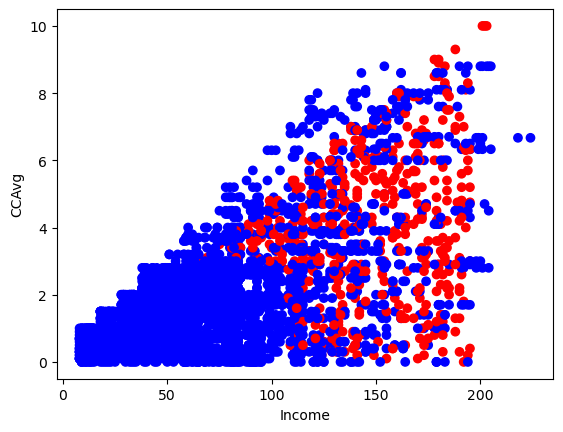

In [8]:
plt.scatter(
    data["Income"],
    data["CCAvg"],
    c=data["Personal Loan"],
    cmap=colors.ListedColormap(["blue", "red"]),
)
plt.xlabel("Income")
plt.ylabel("CCAvg")
plt.show()

Categories with weaker trends exhibit less obvious clustering

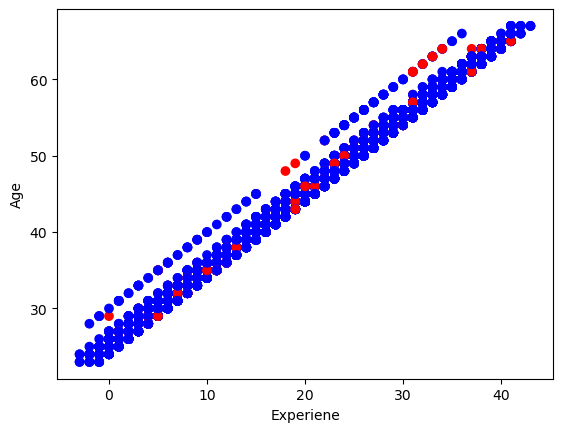

In [9]:
plt.scatter(
    data["Experience"],
    data["Age"],
    c=data["Personal Loan"],
    cmap=colors.ListedColormap(["blue", "red"]),
)
plt.xlabel("Experiene")
plt.ylabel("Age")
plt.show()

# Modeling the data

## Preparing the data

### Split into train and test datasets

In [10]:
data_shuffled = data.sample(frac=1)

In [11]:
train_pct = 0.8
train_n = int(train_pct * len(data_shuffled))
train_data = data_shuffled.iloc[:train_n]
test_data = data_shuffled[train_n:]
print(f"Train data shape: {train_data.shape}\nTest data shape: {test_data.shape}")

Train data shape: (4000, 13)
Test data shape: (1000, 13)


In [12]:
print("Number of personal loans in test data:")
test_data["Personal Loan"].sum()

Number of personal loans in test data:


104

In [13]:
print("Total number of personal loans:")
data["Personal Loan"].sum()

Total number of personal loans:


480

### Prepare training data for the model

In [14]:
X = train_data[categories]
mean, std = X.mean(), X.std()
X_norm = (X - mean) / std
X_norm = np.array(X_norm.T)

Y = np.array(train_data["Personal Loan"]).reshape(1, len(train_data))
Y_norm = Y.copy()

print("Training dataset X containing (CD Account, ..., Education) in the columns:")
print(X_norm)
print("Training dataset Y containing labels of two classes (0: no loan, 1: loan)")
print(Y_norm)

print("The shape of X is: " + str(X_norm.shape))
print("The shape of Y is: " + str(Y_norm.shape))
print("I have m = %d training examples!" % (X_norm.shape[1]))

Training dataset X containing (CD Account, ..., Education) in the columns:
[[-0.24810428 -0.24810428 -0.24810428 ... -0.24810428 -0.24810428
  -0.24810428]
 [ 1.03011432  0.4356525   0.68382588 ... -0.2973247   0.5683964
  -0.1414949 ]
 [ 0.18980373 -0.00703139  1.30520275 ... -0.96933642  1.52390844
  -0.40070163]
 ...
 [-0.3319012  -0.3319012  -0.3319012  ... -0.3319012  -0.3319012
  -0.3319012 ]
 [ 1.34053358 -1.03735304  0.15159027 ...  1.34053358  1.34053358
   1.34053358]
 [-1.22374393  1.40702052 -0.34682245 ... -0.34682245  0.53009904
   1.40702052]]
Training dataset Y containing labels of two classes (0: no loan, 1: loan)
[[0 0 1 ... 0 1 0]]
The shape of X is: (7, 4000)
The shape of Y is: (1, 4000)
I have m = 4000 training examples!


## Building the model

In [15]:
# activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x, n_y)


(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 7
The size of the output layer is: n_y = 1


In [17]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """

    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))

    parameters = {"W": W, "b": b}

    return parameters


parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-0.00718749 -0.00107259  0.00815121  0.00534627  0.00291677 -0.01439601
  -0.01023862]]
b = [[0.]]


In [18]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A -- The output
    """
    W = parameters["W"]
    b = parameters["b"]

    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    A = sigmoid(Z)

    return A


A = forward_propagation(X_norm, parameters)

print("Output vector A:", A)

Output vector A: [[0.49788284 0.49946529 0.50228302 ... 0.4936324  0.49623612 0.49144236]]


In [19]:
def compute_cost(A, Y):
    """
    Computes the log loss cost function

    Arguments:
    A -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    cost -- log loss

    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    logprobs = -np.multiply(np.log(A), Y) - np.multiply(np.log(1 - A), 1 - Y)
    cost = 1 / m * np.sum(logprobs)

    return cost


print("cost = " + str(compute_cost(A, Y_norm)))

cost = 0.693323012554436


In [20]:
def backward_propagation(A, X, Y):
    """
    Implements the backward propagation, calculating gradients

    Arguments:
    A -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]

    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity.
    dZ = A - Y
    dW = 1 / m * np.dot(dZ, X.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)

    grads = {"dW": dW, "db": db}

    return grads


grads = backward_propagation(A, X_norm, Y_norm)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[-0.08910166 -0.10335386 -0.14386583 -0.0345723  -0.00126526 -0.04398499
  -0.02134593]]
db = [[0.40599994]]


In [21]:
def update_parameters(parameters, grads, learning_rate=0.1):
    """
    Updates parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients
    learning_rate -- learning rate parameter for gradient descent

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]

    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]

    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db

    parameters = {"W": W, "b": b}

    return parameters


parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[ 0.00172267  0.0092628   0.02253779  0.0088035   0.0030433  -0.00999752
  -0.00810402]]
b updated = [[-0.04059999]]


In [22]:
def nn_model(X, Y, num_iterations=10, learning_rate=0.1, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration

    Returns:
    parameters -- parameters learnt by the model. They are then used to make predictions.
    """

    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]

    parameters = initialize_parameters(n_x, n_y)

    # Loop
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A".
        A = forward_propagation(X, parameters)

        # Cost function. Inputs: "A, Y". Outputs: "cost".
        cost = compute_cost(A, Y)

        # Backpropagation. Inputs: "A, X, Y". Outputs: "grads".
        grads = backward_propagation(A, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every iteration.
        if print_cost:
            print("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [23]:
parameters = nn_model(
    X_norm, Y_norm, num_iterations=1000, learning_rate=1, print_cost=True
)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

Cost after iteration 0: 0.692119
Cost after iteration 1: 0.513377
Cost after iteration 2: 0.415154
Cost after iteration 3: 0.355261
Cost after iteration 4: 0.315594
Cost after iteration 5: 0.287644
Cost after iteration 6: 0.266982
Cost after iteration 7: 0.251114
Cost after iteration 8: 0.238547
Cost after iteration 9: 0.228341
Cost after iteration 10: 0.219876
Cost after iteration 11: 0.212732
Cost after iteration 12: 0.206614
Cost after iteration 13: 0.201307
Cost after iteration 14: 0.196656
Cost after iteration 15: 0.192540
Cost after iteration 16: 0.188870
Cost after iteration 17: 0.185573
Cost after iteration 18: 0.182592
Cost after iteration 19: 0.179884
Cost after iteration 20: 0.177411
Cost after iteration 21: 0.175142
Cost after iteration 22: 0.173052
Cost after iteration 23: 0.171120
Cost after iteration 24: 0.169330
Cost after iteration 25: 0.167664
Cost after iteration 26: 0.166111
Cost after iteration 27: 0.164659
Cost after iteration 28: 0.163298
Cost after iteration 29:

In [24]:
def predict(X_pred, parameters):
    A = forward_propagation(X_pred, parameters)
    return A > 0.33

# Results

## Training data

In [25]:
Y_pred = predict(X_norm, parameters)

Overall accuracy

In [26]:
pct_correct = round(100 * (1 - np.abs((Y_pred - Y_norm)).sum() / len(Y_pred[0])), 1)
print(f"Accuracy: {pct_correct}%")

Accuracy: 94.6%


Proportion of loans accuracy

In [27]:
pct_correct = round(100 * (1 - abs(1 - Y_pred.sum() / Y_norm.sum())), 1)
print(f"Loan proportion accuracy: {pct_correct}%")

Loan proportion accuracy: 99.2%


Correctly identified loans

In [28]:
df = pd.DataFrame(columns=["Actual", "Prediction"])
df["Actual"] = Y_norm[0]
df["Prediction"] = Y_pred[0] * 1

In [29]:
loans = df[df["Actual"] == 1]
pct_correct = round(
    100 * (1 - np.abs((loans["Actual"] - loans["Prediction"])).sum() / len(loans)), 1
)
print(f"Loans identified accuracy: {pct_correct}%")

Loans identified accuracy: 70.7%


Correctly identified no-loans

In [30]:
no_loans = df[df["Actual"] == 0]
pct_correct = round(
    100
    * (1 - np.abs((no_loans["Actual"] - no_loans["Prediction"])).sum() / len(no_loans)),
    1,
)
print(f"No-loan identification accuracy: {pct_correct}%")

No-loan identification accuracy: 97.0%


## Test data

In [31]:
X_test = test_data[categories]
# mean, std = X.mean(), X.std() # use same mean and std from train data
X_test_norm = (X_test - mean) / std
X_test_norm = np.array(X_test_norm.T)

Y_test = np.array(test_data["Personal Loan"]).reshape(1, len(test_data))
Y_test_norm = Y_test.copy()

print("Testing dataset X containing (CD Account, ..., Education) in the columns:")
print(X_test_norm)
print("Testing dataset Y containing labels of two classes (0: no loan, 1: loan)")
print(Y_test_norm)

print("The shape of X is: " + str(X_test_norm.shape))
print("The shape of Y is: " + str(Y_test_norm.shape))
print("I have m = %d testing examples!" % (X_test_norm.shape[1]))

Testing dataset X containing (CD Account, ..., Education) in the columns:
[[-0.24810428 -0.24810428 -0.24810428 ... -0.24810428 -0.24810428
  -0.24810428]
 [-0.18189522 -0.93218684  0.45296692 ... -0.8744721  -0.23960996
  -0.23960996]
 [-0.4225722  -0.72876016 -0.46631334 ... -1.0568187  -0.99120699
   0.45225056]
 ...
 [-0.3319012  -0.3319012  -0.3319012  ... -0.3319012  -0.3319012
  -0.3319012 ]
 [ 0.15159027 -1.03735304  0.15159027 ...  1.34053358  0.15159027
   1.34053358]
 [-1.22374393 -1.22374393  0.53009904 ...  1.40702052  1.40702052
  -1.22374393]]
Testing dataset Y containing labels of two classes (0: no loan, 1: loan)
[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
  0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [32]:
Y_test_pred = predict(X_test_norm, parameters)

Overall accuracy

In [33]:
pct_correct = round(
    100 * (1 - np.abs((Y_test_norm - Y_test_pred)).sum() / len(Y_test_pred[0])), 1
)
print(f"Accuracy: {pct_correct}%")

Accuracy: 93.5%


Proportion of loans accuracy

In [34]:
pct_correct = round(100 * (1 - abs(1 - Y_test_pred.sum() / Y_test_norm.sum())), 1)
print(f"Loan proportion accuracy: {pct_correct}%")

Loan proportion accuracy: 95.2%


Correctly identified loans

In [35]:
df = pd.DataFrame(columns=["Actual", "Prediction"])
df["Actual"] = Y_test_norm[0]
df["Prediction"] = Y_test_pred[0] * 1

In [36]:
loans = df[df["Actual"] == 1]
pct_correct = round(
    100 * (1 - np.abs((loans["Actual"] - loans["Prediction"])).sum() / len(loans)), 1
)
print(f"Loans identified accuracy: {pct_correct}%")

Loans identified accuracy: 71.2%


Correctly identified no-loans

In [37]:
no_loans = df[df["Actual"] == 0]
pct_correct = round(
    100
    * (1 - np.abs((no_loans["Actual"] - no_loans["Prediction"])).sum() / len(no_loans)),
    1,
)
print(f"No-loan identification accuracy: {pct_correct}%")

No-loan identification accuracy: 96.1%
